### Dataset
In this homework,we will use the Car price dataset.

We'll keep working with the MSRP variable, and we'll transform it to a classification task.

### Features
For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data preparation
* Select only the features from above and transform their names using the next line: 
- data.columns = data.columns.str.replace(' ', '_').str.lower()
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`

In [4]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df[['make','model','year','engine_hp','engine_cylinders','transmission_type','vehicle_style','highway_mpg','city_mpg','msrp']]
df.columns = ['make','model','year','engine_hp','engine_cylinders','transmission_type','vehicle_style','highway_mpg','city_mpg','price']

In [5]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [7]:
df.fillna(0, inplace=True)

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

* `AUTOMATIC`
* `MANUAL`
* `AUTOMATED_MANUAL`
* `DIRECT_DRIVE`

In [8]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

* `engine_hp` and `year`
* `engine_hp` and `engine_cylinders`
* `highway_mpg` and `engine_cylinders`
* `highway_mpg` and `city_mpg`

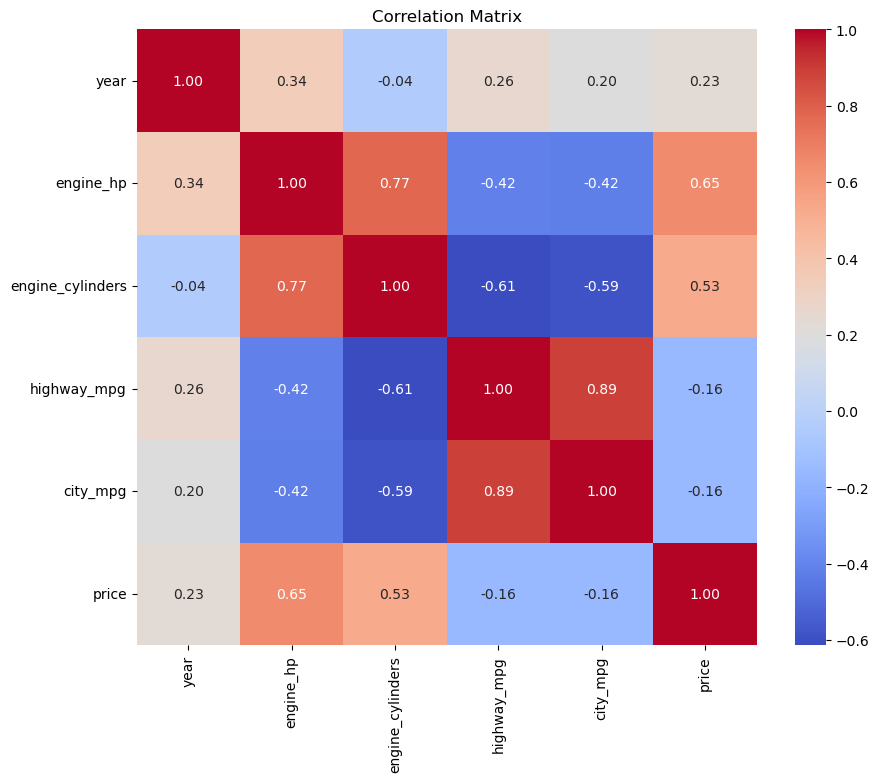

The two features with the highest correlation are:
city_mpg   highway_mpg         0.886829
engine_hp  engine_cylinders    0.774851
dtype: float64


In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

max_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("The two features with the highest correlation are:")
print(max_correlation[1:3])

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [10]:
mean = df.price.mean()
mean

40594.737032063116

In [11]:
df['above_average'] = (df.price > mean).astype(int)
df['above_average']

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int32

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
len(df_full_train), len(df_test)

(9531, 2383)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [15]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['price']
del df_val['price']
del df_test['price']

### Question 3
* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?

* `make`
* `model`
* `transmission_type`
* `vehicle_style`

In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
categorical = [
    'make',
    'model',
    'transmission_type',
    'vehicle_style',
]

In [20]:
for c in categorical:
    print(c, round(mutual_info_score(y_train, df_train[c]),2))

make 0.24
model 0.46
transmission_type 0.02
vehicle_style 0.08


transmission_type

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

* 0.60
* 0.72
* 0.84
* 0.95

In [21]:
from sklearn.feature_extraction import DictVectorizer

In [22]:
numerical = ['year', 'engine_hp', 'engine_cylinders',  'highway_mpg', 'city_mpg']

In [23]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [24]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [25]:
X_train = dv.transform(train_dict)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [28]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [29]:
y_pred = model.predict_proba(X_val)[:, 1]

In [30]:
y_preds = y_pred > 0.5

In [31]:
acc = (y_val == y_preds).mean()
acc

0.9471254720939991

In [32]:
round(acc,2)

0.95

### Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

* `year`
* `engine_hp`
* `transmission_type`
* `city_mpg`

> Note: the difference doesn't have to be positive

In [33]:
features = [
    "year",
    "engine_hp",
    "transmission_type",
    "city_mpg",
]

In [34]:
for feature in features:
    df_remove = df_train.drop(feature,axis=1)
    df_dict_remove = df_remove.to_dict(orient = 'records')
    X_train_remove = dv.fit_transform(df_dict_remove)
    
    df_val_remove = df_val.drop(feature,axis=1)
    val_dicts = df_val_remove.to_dict(orient = 'records')
    X_val_remove = dv.transform(val_dicts)
    
    model.fit(X_train_remove, y_train)
    
    y_pred_remove = model.predict_proba(X_val_remove)[:,1]
    accuracy_remove = (y_pred_remove >= 0.5)
    accuracy = (y_val == accuracy_remove).mean()
    print(feature, (acc - accuracy))

year -0.05287452790600089
engine_hp -0.05287452790600089
transmission_type -0.05245488879563576
city_mpg -0.05287452790600089


transmission_type

### Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

* 0
* 0.01
* 0.1
* 1
* 10

> Note: If there are multiple options, select the smallest `alpha`.

In [35]:
from sklearn.linear_model import Ridge

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [37]:
df_ = df.copy()
df_['price'] = np.log1p(df_['price'])

In [38]:
X = df_[[c for c in df_.columns if c not in ['price', 'above_average']]].copy()
Y = df_[['price']].copy()

In [39]:
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.25, random_state=42)

In [ ]:
alpha = [0, 0.01, 0.1, 1, 10]
result_df = pd.DataFrame()
for a in alpha: 
    onehot_encoder = OneHotEncoder(drop='first', dtype=int, handle_unknown='ignore')
    train_encoded = onehot_encoder.fit_transform(x_train)
    val_encoded = onehot_encoder.transform(x_val)
    
    ridge_model = Ridge(alpha=a, solver='sag', random_state=42)
    ridge_model = ridge_model.fit(train_encoded, np.log1p(y_train))
    y_preds = np.ravel(ridge_model.predict(val_encoded))
    rmse = np.sqrt(mean_squared_error(y_true=np.log1p(np.ravel(y_val)), y_pred=y_preds))
    result_dict = pd.DataFrame({'alpha': a, 'rmse': rmse},  index=[0])
    if result_df.shape[0] == 0:
        result_df = result_dict.copy()
    else:
        result_df = pd.concat([result_df, result_dict], ignore_index=True)

In [41]:
result_df.sort_values('rmse', ascending=True)

,alpha,rmse
1,0.01,0.010211
0,0.00,0.010216
2,0.10,0.010436
3,1.00,0.012687
4,10.00,0.021322


alpha = 0.01